In [1]:
library(dplyr)

library(clusterProfiler)
library(ktplots)
library(fgsea)
library(msigdbr)





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: ggplot2

Loading required package: Rcpp



In [2]:
setwd('/Users/matthewcoates/Documents/Cambridge/R files/COVID scRNAseq nasal biopsy + blood/')

In [3]:
degs <- as.list(list.files('DEGs/120721/MildCovvHealthy/', full.names= TRUE, pattern ='.csv'))

In [4]:
names(degs) <- gsub('DEGs/120721/MildCovvHealthy/DEG_B_FO_mCOVH.csv', '', list.files('DEGs/120721/MildCovvHealthy/',pattern ='.csv'))
names(degs) <- substr(names(degs), start = 1, stop = nchar(names(degs))-4)
names(degs)

[1] "DEG_B_FO_mCOVH"              "DEG_B_Naive_mCOVH"          
 [3] "DEG_B_nonswitched_mCOVH"     "DEG_B_switched_mCOVH"       
 [5] "DEG_Basophil_mCOVH"          "DEG_CD4_Act_mCOVH"          
 [7] "DEG_CD4_Tcm_mCOVH"           "DEG_CD4_Tem_mCOVH"          
 [9] "DEG_CD4_Th17_mCOVH"          "DEG_CD4_Tn_mCOVH"           
[11] "DEG_CD4_Trm_mCOVH"           "DEG_CD8_CTL_mCOVH"          
[13] "DEG_CD8_Tn_mCOVH"            "DEG_CD8_Trm_mCOVH"          
[15] "DEG_cDC_CD141_mCOVH"         "DEG_cDC_CD1c_mCOVH"         
[17] "DEG_Epi_Basal_mCOVH"         "DEG_Epi_Ciliated_mCOVH"     
[19] "DEG_Epi_Secretory_mCOVH"     "DEG_gdT_vd1_mCOVH"          
[21] "DEG_gdT_vd2_mCOVH"           "DEG_gdT_vd3_mCOVH"          
[23] "DEG_ILC_mCOVH"               "DEG_MAIT_mCOVH"             
[25] "DEG_Mast_mCOVH"              "DEG_Mega_mCOVH"             
[27] "DEG_MMP_nonres_mCOVH"        "DEG_MMP_res_mCOVH"          
[29] "DEG_Mono_classical_mCOVH"    "DEG_Mono_nonclassical_mCOVH"
[31] "DEG_NK_adaptive_mCOVH"       "DEG_NK_CD16_mCOVH"          
[33] "DEG_NK_CD56_mCOVH"           "DEG_pDC_mCOVH"              
[35] "DEG_Plasma_blastIgM_mCOVH"   "DEG_Plasma_mCOVH"           
[37] "DEG_Tfh_mCOVH"               "DEG_Treg_mCOVH"

In [5]:
degs <- lapply(degs, readr::read_csv)
degs <- degs[order(names(degs))]
degs

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_ad

Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names f

X1,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CXCR4,3.760511e-26,-1.180768,0.360,0.600,9.655111e-22
NR4A2,9.785873e-22,-1.259335,0.089,0.293,2.512523e-17
ZFP36,2.728238e-21,-1.111337,0.242,0.486,7.004752e-17
BTG2,3.245118e-21,-1.086605,0.200,0.424,8.331842e-17
EZR,6.219816e-17,-1.099412,0.326,0.524,1.596938e-12
IGKV3-20,8.180420e-09,1.525638,0.258,0.154,2.100323e-04
X1,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H1FX,1.471796e-07,1.832310,0.263,0.039,0.003778835


In [6]:
# GSEA of hallmark signatures

m_df = msigdbr(species = "Homo sapiens", category = "H")
m_df <- split(m_df, m_df$gs_name)
m_df <- lapply(m_df, function(x) x$gene_symbol)
ranklist <- lapply(degs, function(x) {
  y <- grepl('^RPS|^RPL|^MRPL|^MPRS|MT-|^HB|^IG', x$X1)
  x <- x[!y, ]
  gl <- x %>% dplyr::select(X1, avg_log2FC, p_val)
  gl$neglog10pval <- -log10(gl$p_val)
  rank <- unlist(gl$neglog10pval*sign(gl$avg_log2FC))
  rank[which(rank == -Inf)] <- -308
  rank[which(rank == Inf)] <- 308
  names(rank) <- gl$X1
  rank <- rev(sort(rank))
  return(rank)
})

In [7]:
hallmark_res <- lapply(ranklist, function(x) tryCatch(fgsea(pathways = m_df, stats = x, nperm=10000, minSize = 0, maxSize = 1000), error = function(e) {return(NULL)}))
hallmark_res <- lapply(hallmark_res, data.frame)

Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (16.59% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (1.77% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (25.76% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [8]:
hallmark_res

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_APOPTOSIS,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_ESTROGEN_RESPONSE_LATE,1.0000000,1.000000,0.0000000,0.0000000,6005,1,
HALLMARK_GLYCOLYSIS,0.3349983,0.935988,-1.0000000,-1.7056025,2011,1,CXCR4
HALLMARK_HEME_METABOLISM,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_HYPOXIA,0.5009211,0.935988,-0.6666667,-1.1409024,2990,2,"CXCR4, ZFP36"
HALLMARK_INFLAMMATORY_RESPONSE,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_KRAS_SIGNALING_DN,0.8025085,0.972841,0.3333333,0.6014463,4030,2,"BTG2 , NR4A2"
HALLMARK_KRAS_SIGNALING_UP,0.3349983,0.935988,-1.0000000,-1.7056025,2011,1,CXCR4
HALLMARK_MITOTIC_SPINDLE,0.3270872,0.935988,1.0000000,1.7149006,1954,1,EZR


In [9]:
summary(hallmark_res)

                            Length Class      Mode
DEG_B_FO_mCOVH              8      data.frame list
DEG_B_Naive_mCOVH           8      data.frame list
DEG_B_nonswitched_mCOVH     8      data.frame list
DEG_B_switched_mCOVH        8      data.frame list
DEG_Basophil_mCOVH          8      data.frame list
DEG_CD4_Act_mCOVH           8      data.frame list
DEG_CD4_Tcm_mCOVH           8      data.frame list
DEG_CD4_Tem_mCOVH           8      data.frame list
DEG_CD4_Th17_mCOVH          8      data.frame list
DEG_CD4_Tn_mCOVH            0      data.frame list
DEG_CD4_Trm_mCOVH           8      data.frame list
DEG_CD8_CTL_mCOVH           8      data.frame list
DEG_CD8_Tn_mCOVH            0      data.frame list
DEG_CD8_Trm_mCOVH           8      data.frame list
DEG_cDC_CD141_mCOVH         8      data.frame list
DEG_cDC_CD1c_mCOVH          8      data.frame list
DEG_Epi_Basal_mCOVH         8      data.frame list
DEG_Epi_Ciliated_mCOVH      8      data.frame list
DEG_Epi_Secretory_mCOVH     8  

In [10]:
hallmark_res[[1]]

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_APOPTOSIS,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_ESTROGEN_RESPONSE_LATE,1.0000000,1.000000,0.0000000,0.0000000,6005,1,
HALLMARK_GLYCOLYSIS,0.3349983,0.935988,-1.0000000,-1.7056025,2011,1,CXCR4
HALLMARK_HEME_METABOLISM,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_HYPOXIA,0.5009211,0.935988,-0.6666667,-1.1409024,2990,2,"CXCR4, ZFP36"
HALLMARK_INFLAMMATORY_RESPONSE,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_KRAS_SIGNALING_DN,0.8025085,0.972841,0.3333333,0.6014463,4030,2,"BTG2 , NR4A2"
HALLMARK_KRAS_SIGNALING_UP,0.3349983,0.935988,-1.0000000,-1.7056025,2011,1,CXCR4
HALLMARK_MITOTIC_SPINDLE,0.3270872,0.935988,1.0000000,1.7149006,1954,1,EZR


In [11]:
plot_GSEA <- function(gsea,
                       filename,
                      h = 3, w = 5) {
  require(ggplot2)
  gsea$pathway <- gsub("HALLMARK_", "", gsea$pathway)
  gsea$pathway <- gsub("_", " ", gsea$pathway)
  gsea$pathway <- tools::toTitleCase(tolower(gsea$pathway))
  gsea$pathway <- factor(gsea$pathway, levels = unique(gsea$pathway))
  gsea$NES[which(is.na(gsea$NES))] <- 0
  gsea$pval[which(gsea$pval == 0)] <- 0.001
  gsea$pval[which(gsea$pval == 1)] <- 0.99999
  gsea$padj[which(gsea$padj == 0)] <- 0.001
  gsea$padj[which(gsea$padj == 1)] <- 0.99999
  gsea <- gsea[-which(gsea$pval >= 0.05), ]
  gsea$ranking <- -log10(gsea$pval)*sign(gsea$NES)
  gsea <- gsea[order(gsea$ranking), ]
  x_lim_min <- abs(ceiling(min(-log10(gsea$pval))))
  x_lim_max <- abs(ceiling(max(-log10(gsea$pval))))
  if(x_lim_min > x_lim_max){
    xval1 <- x_lim_min * -1
    xval2 <- x_lim_min
  } else {
    xval1 <- x_lim_max * -1
    xval2 <- x_lim_max
  }
  g <- ggplot(gsea, aes(x = ranking, y = reorder(pathway, ranking), col = padj, size = abs(NES))) +
    geom_point(alpha = 0.8) +
    scale_color_gradientn(
      colours = c(
        # rev(colorRampPalette(RColorBrewer::brewer.pal(9, 'YlGnBu'))(125)),
        viridis::viridis(125, direction = -1),
        rep("#E7E7E7", 375)), limits = c(0:1)) +
    labs(x = expression(paste("Signed", " -log" ["10"], "pval")), y = "Hallmarks") +
    scale_y_discrete(labels = gsea$pathway) +
    theme_bw() +
    geom_vline(xintercept = 0, linetype="dashed", alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25), linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25)*-1, linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    theme(
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      axis.line = element_line(colour = "black")) +
    # annotate("rect", xmin=-Inf, xmax=0, ymin=0, ymax=Inf, alpha = 0.1) +
    xlim(xval1, xval2) +
    scale_radius(range = c(3,7)) +
    coord_cartesian(clip = 'off') + small_guide() + small_legend(keysize=.5) +
    ggtitle(names(ranklist)[i])
  return(g)
   ggsave(file = filename, plot = g, device = 'pdf', useDingbats = FALSE, h = h, w = w)
}



In [12]:
names(ranklist)

[1] "DEG_B_FO_mCOVH"              "DEG_B_Naive_mCOVH"          
 [3] "DEG_B_nonswitched_mCOVH"     "DEG_B_switched_mCOVH"       
 [5] "DEG_Basophil_mCOVH"          "DEG_CD4_Act_mCOVH"          
 [7] "DEG_CD4_Tcm_mCOVH"           "DEG_CD4_Tem_mCOVH"          
 [9] "DEG_CD4_Th17_mCOVH"          "DEG_CD4_Tn_mCOVH"           
[11] "DEG_CD4_Trm_mCOVH"           "DEG_CD8_CTL_mCOVH"          
[13] "DEG_CD8_Tn_mCOVH"            "DEG_CD8_Trm_mCOVH"          
[15] "DEG_cDC_CD141_mCOVH"         "DEG_cDC_CD1c_mCOVH"         
[17] "DEG_Epi_Basal_mCOVH"         "DEG_Epi_Ciliated_mCOVH"     
[19] "DEG_Epi_Secretory_mCOVH"     "DEG_gdT_vd1_mCOVH"          
[21] "DEG_gdT_vd2_mCOVH"           "DEG_gdT_vd3_mCOVH"          
[23] "DEG_ILC_mCOVH"               "DEG_MAIT_mCOVH"             
[25] "DEG_Mast_mCOVH"              "DEG_Mega_mCOVH"             
[27] "DEG_MMP_nonres_mCOVH"        "DEG_MMP_res_mCOVH"          
[29] "DEG_Mono_classical_mCOVH"    "DEG_Mono_nonclassical_mCOVH"
[31] "DEG_NK_adaptive_mCOVH"       "DEG_NK_CD16_mCOVH"          
[33] "DEG_NK_CD56_mCOVH"           "DEG_pDC_mCOVH"              
[35] "DEG_Plasma_blastIgM_mCOVH"   "DEG_Plasma_mCOVH"           
[37] "DEG_Tfh_mCOVH"               "DEG_Treg_mCOVH"

In [22]:
names(ranklist[17])

[1] "DEG_Epi_Basal_mCOVH"

In [14]:
hallmark_res

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_APOPTOSIS,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_ESTROGEN_RESPONSE_LATE,1.0000000,1.000000,0.0000000,0.0000000,6005,1,
HALLMARK_GLYCOLYSIS,0.3349983,0.935988,-1.0000000,-1.7056025,2011,1,CXCR4
HALLMARK_HEME_METABOLISM,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_HYPOXIA,0.5009211,0.935988,-0.6666667,-1.1409024,2990,2,"CXCR4, ZFP36"
HALLMARK_INFLAMMATORY_RESPONSE,0.6685628,0.935988,0.7500000,1.2861755,3995,1,BTG2
HALLMARK_KRAS_SIGNALING_DN,0.8025085,0.972841,0.3333333,0.6014463,4030,2,"BTG2 , NR4A2"
HALLMARK_KRAS_SIGNALING_UP,0.3349983,0.935988,-1.0000000,-1.7056025,2011,1,CXCR4
HALLMARK_MITOTIC_SPINDLE,0.3270872,0.935988,1.0000000,1.7149006,1954,1,EZR


Warning message in min(-log10(gsea$pval)):
“no non-missing arguments to min; returning Inf”
Warning message in max(-log10(gsea$pval)):
“no non-missing arguments to max; returning -Inf”
Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


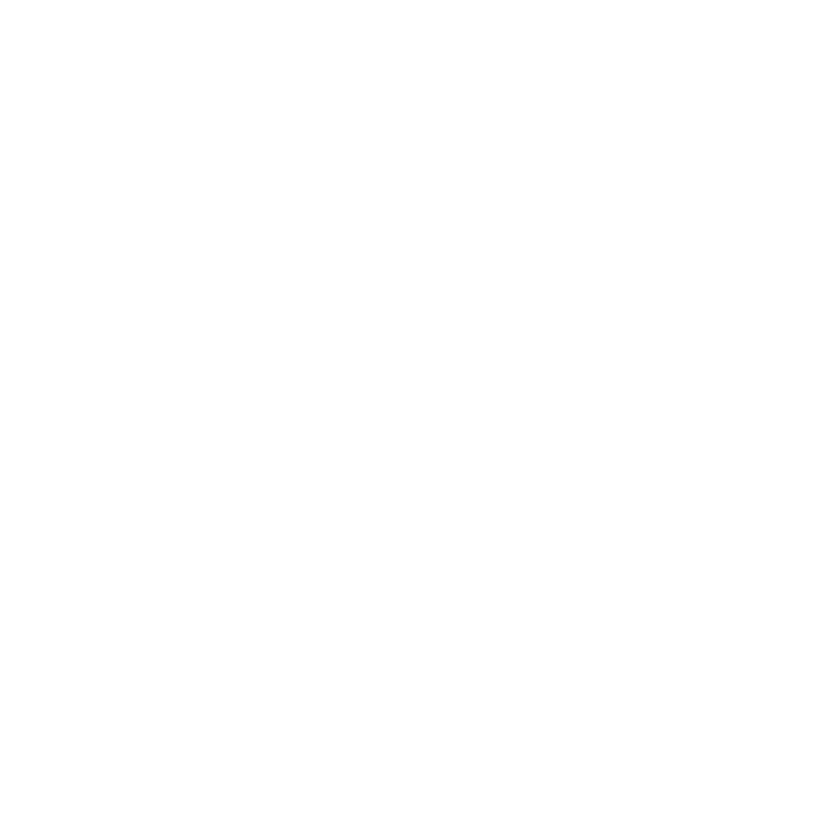

In [15]:
for (i in 1:length(ranklist)){
  plot <- tryCatch(expr = hallmark_res)
  plot <- plot_GSEA(hallmark_res[[i]])
    print(plot)
}

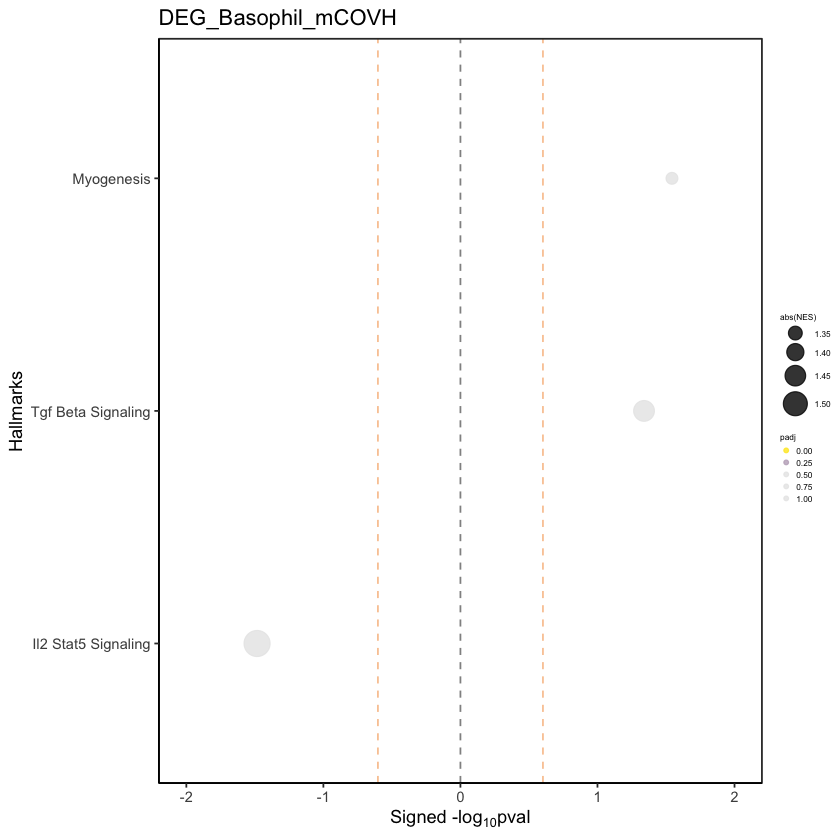

In [16]:
plot_GSEA(hallmark_res[[5]]) + ggtitle(names(ranklist[5]))

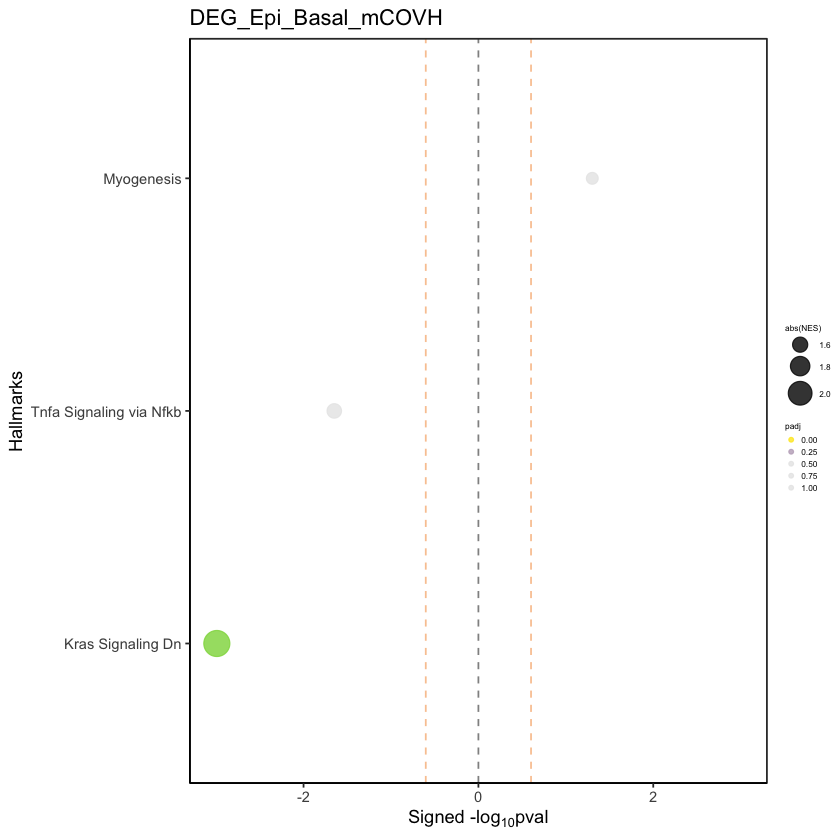

In [23]:
plot_GSEA(hallmark_res[[17]]) + ggtitle(names(ranklist[17]))

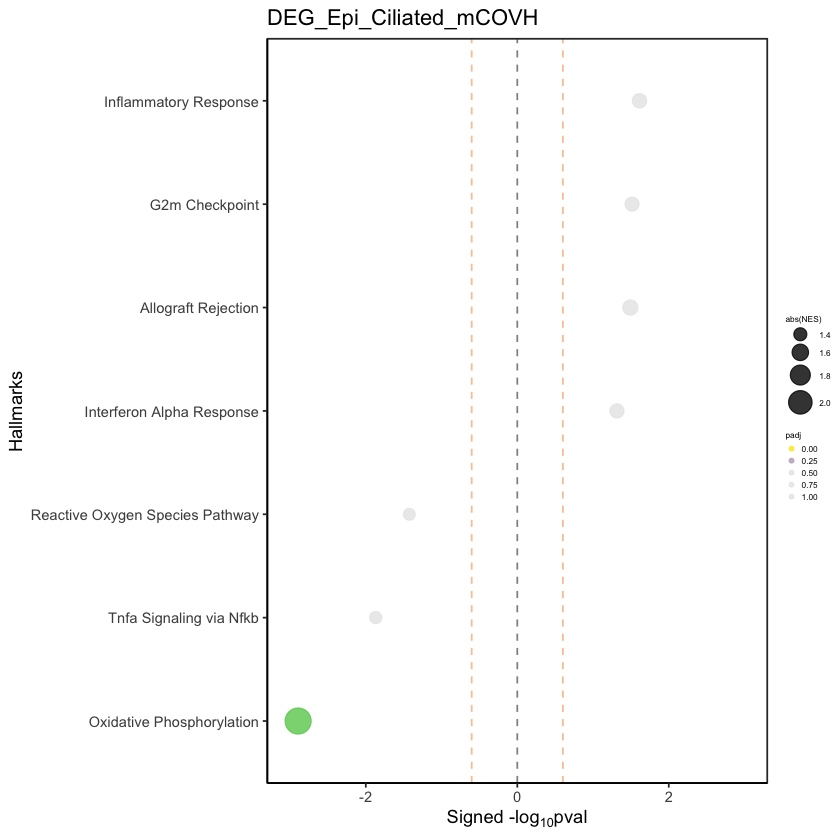

In [24]:
plot_GSEA(hallmark_res[[18]]) + ggtitle(names(ranklist[18]))

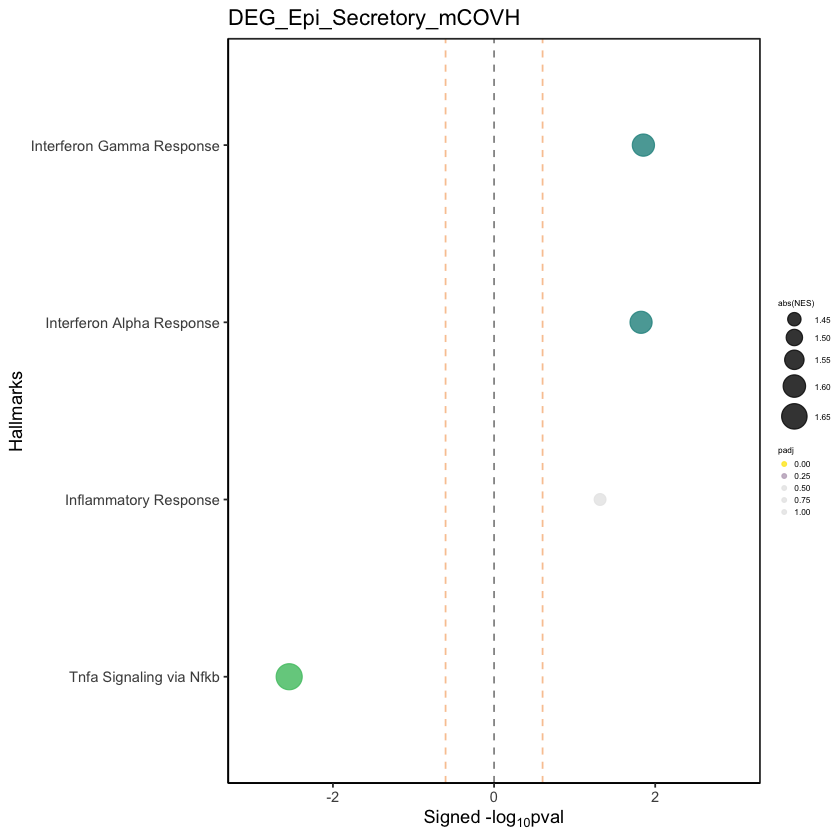

In [25]:
plot_GSEA(hallmark_res[[19]]) + ggtitle(names(ranklist[19]))

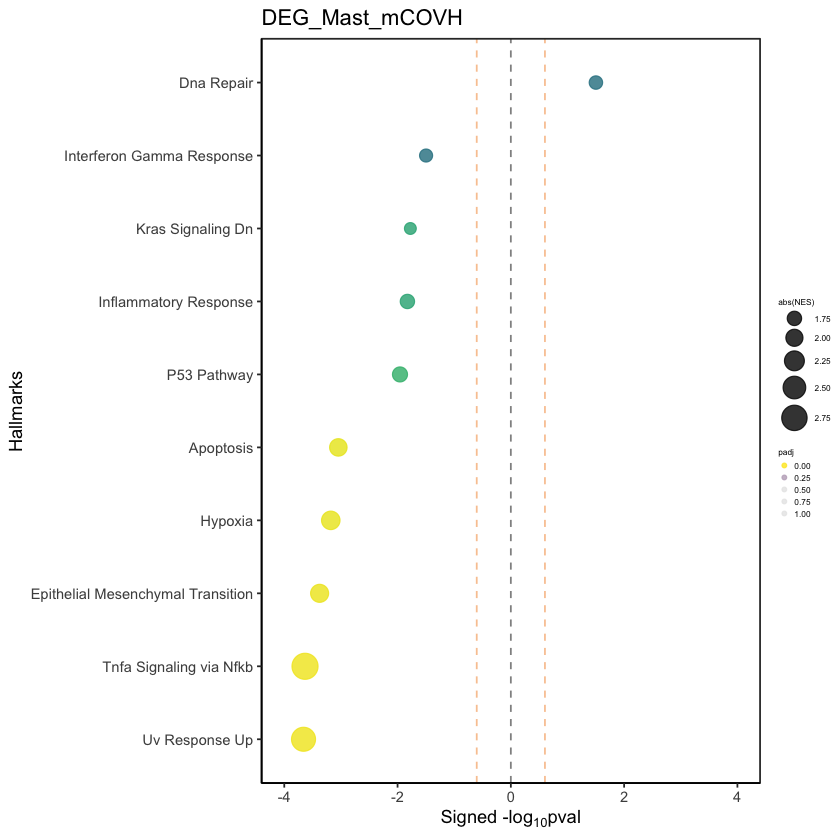

In [31]:
plot_GSEA(hallmark_res[[25]]) + ggtitle(names(ranklist[25]))

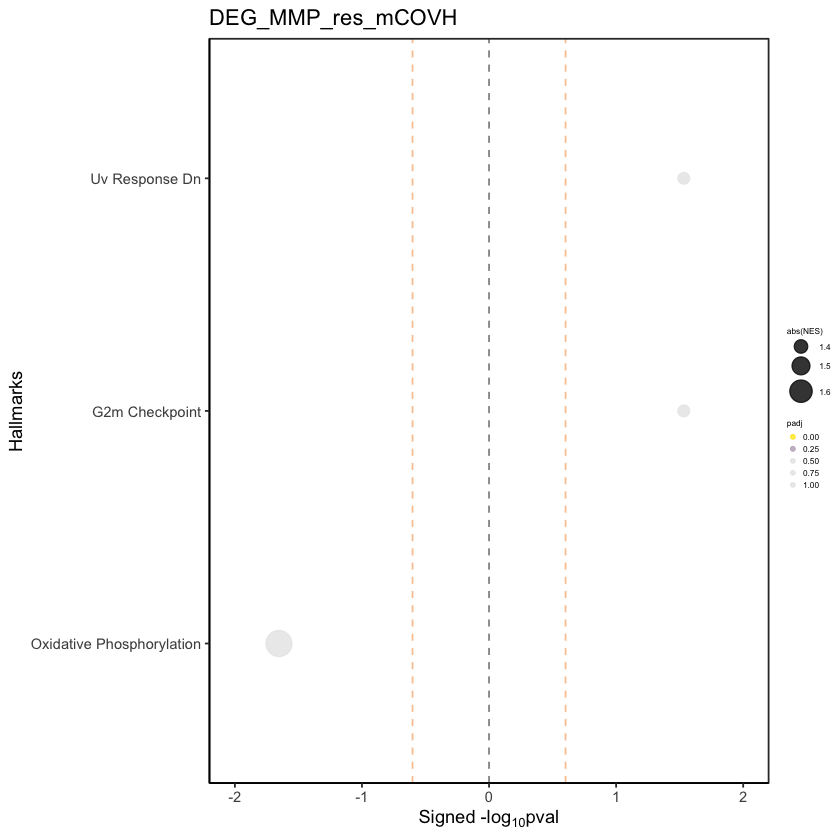

In [34]:
plot_GSEA(hallmark_res[[28]]) + ggtitle(names(ranklist[28]))

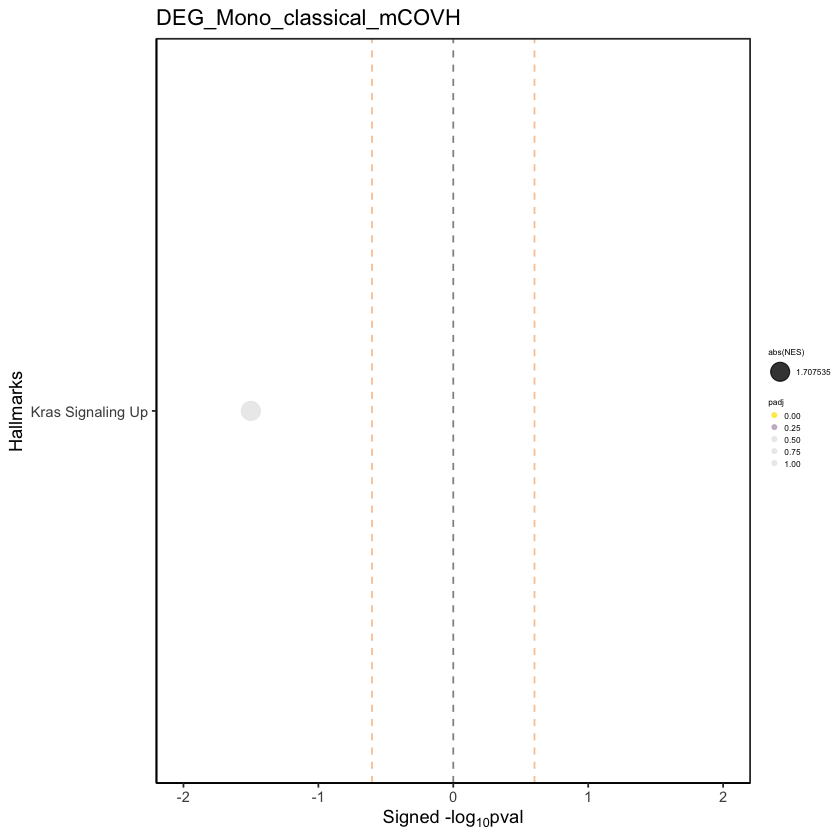

In [35]:
plot_GSEA(hallmark_res[[29]]) + ggtitle(names(ranklist[29]))

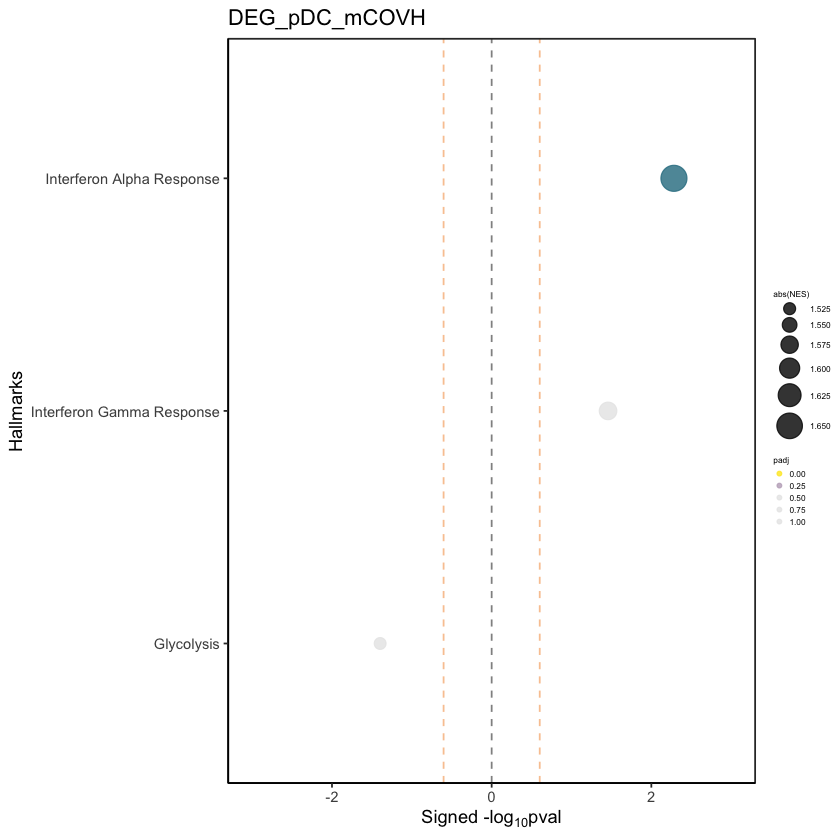

In [40]:
plot_GSEA(hallmark_res[[34]]) + ggtitle(names(ranklist[34]))

In [72]:
for (i in 1:length(ranklist)){
  hallmark_res[[i]]$label = names(ranklist)[i]
}
combined_res = do.call(rbind, hallmark_res)
row.names(combined_res) <- NULL
combined_res$leadingEdge <- do.call(c, lapply(combined_res$leadingEdge, paste, collapse = "|"))
write.csv(data.frame(combined_res), file = 'figures/dotplot/mnp_gsea_hallmark.csv')

In [73]:
?pdf